In [1]:
# Import the Libraries
import os
import glob
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
from matplotlib.animation import FuncAnimation
import pandas as pd

In [2]:
#%% go to the folder and read a netcdf file

nc_path = "/Users/rishi/Desktop/All Folders/Sea Ice Datasets/Sea_Ice_Age/"
nc_files = sorted(glob.glob(os.path.join(nc_path, "*.nc")))
ds = xr.open_mfdataset(nc_files, combine='by_coords')

# read the sea ice age data
sea_ice_age = ds['age_of_sea_ice']

# Read latitude and longitude
sample_ds = xr.open_dataset(nc_files[0])
latitude = sample_ds['latitude']
longitude = sample_ds['longitude']

# Mask the data as per the age requirements
sea_ice_age = sea_ice_age.where(sea_ice_age <= 19.99, np.nan)
sea_ice_age = sea_ice_age.where(sea_ice_age >= 0.1, np.nan)


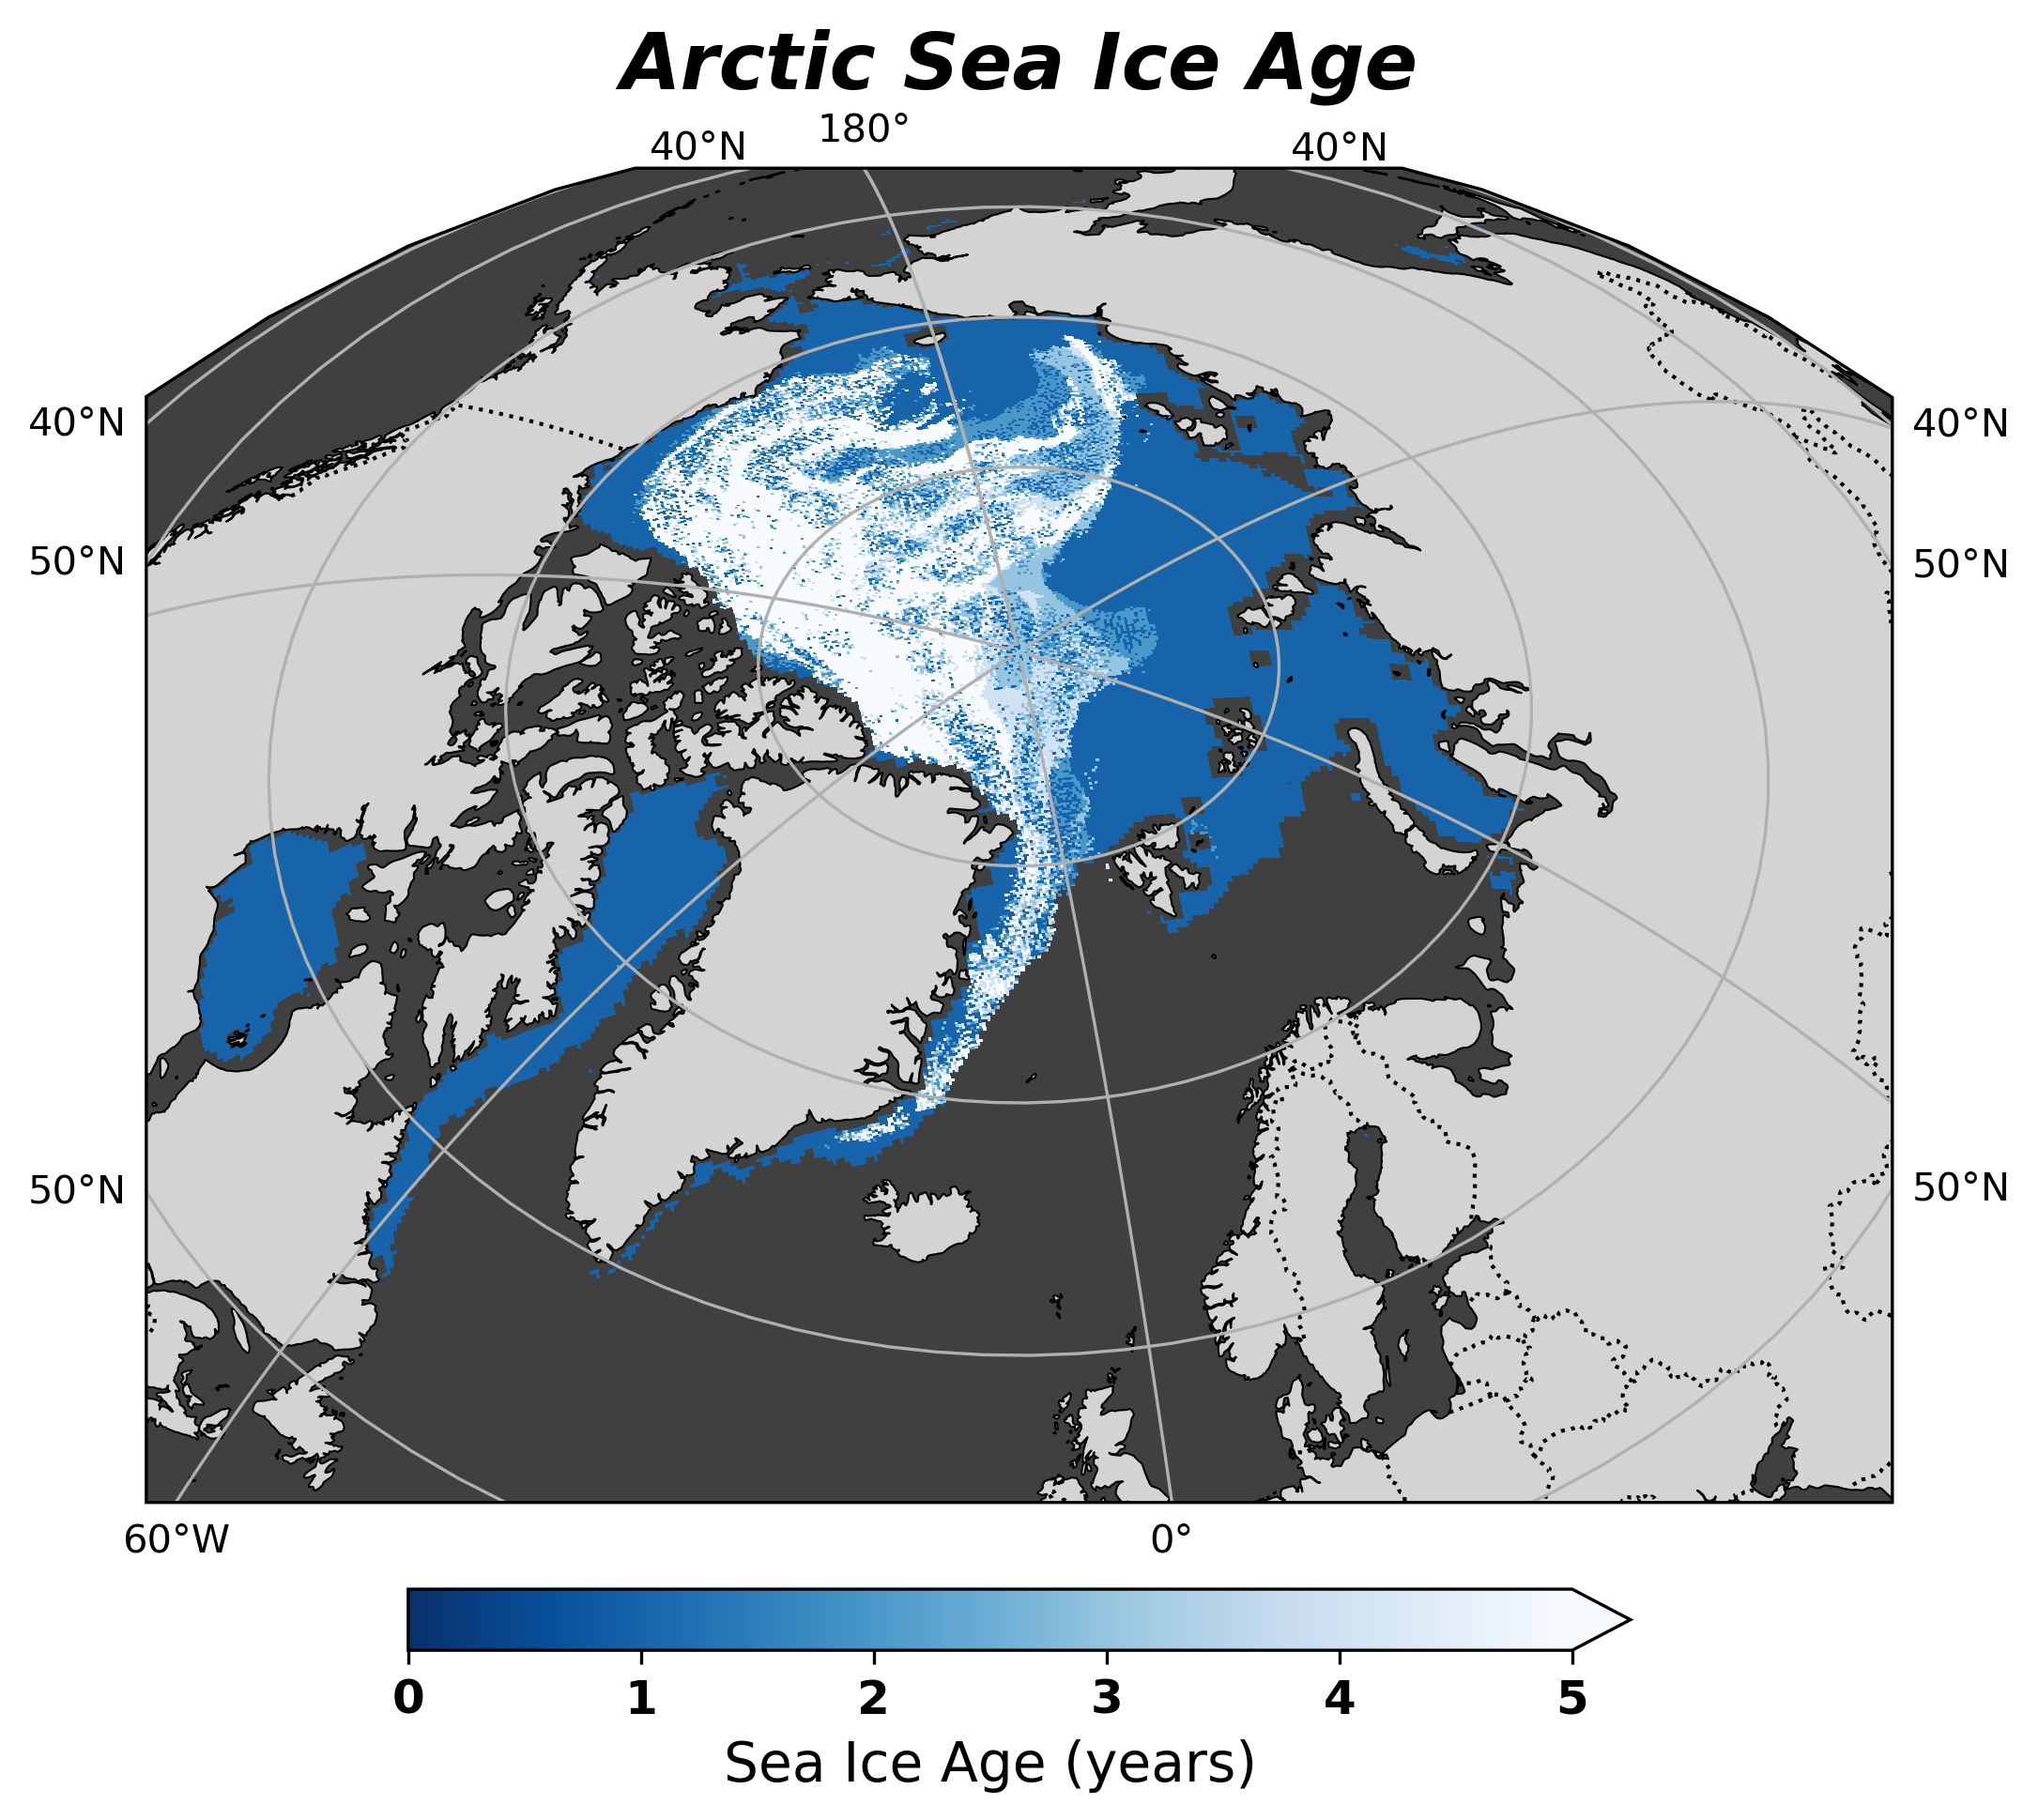

In [3]:
# Create a figure with projection
plt.figure(figsize=(8, 8), dpi=300)
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-10,\
                                           central_latitude=50))

# Add geographic features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=1, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor = '0.25')
ax.set_extent([-180, 180, 54, 90], crs=ccrs.PlateCarree())
#ax.set_global() # turn off if dont want show the whole globe
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Plot the SIC data
c = ax.pcolormesh(longitude, latitude, sea_ice_age[853,:,:],
                  transform=ccrs.PlateCarree(), 
                  cmap = 'Blues_r', 
                  shading='auto',
                  vmin=0, vmax=5)

# Add a colorbar
cb = plt.colorbar(c, ax=ax,
                  orientation='horizontal',
                  shrink=0.7,
                  pad=0.05,
                  extend='max')

cb.set_label("Sea Ice Age (years)", fontsize=14)
cb.ax.tick_params(labelsize=12)  # ← Increase tick label font size
for tick in cb.ax.get_xticklabels():
    tick.set_fontweight('bold')

# add title
plt.title("Arctic Sea Ice Age", fontsize =20, fontstyle='italic',fontweight='bold')
plt.show()

In [ ]:
import pandas as pd
start = pd.Timestamp("1984-01-01")
times = pd.date_range(start=start, periods=2080, freq="W")

# Create output folder
output_folder = '/Users/rishi/Desktop/All Folders/Sea Ice Datasets/Output_frames'
os.makedirs(output_folder, exist_ok=True)

# Build the weekly dates
start_date = pd.Timestamp("1984-01-01")
times = pd.date_range(start=start_date, periods=2080, freq='W')

# Loop through all weekly time steps
for i in range (4): # just for a small test run
#for i in range(len(times)):  
    date = times[i]
    title_month_year = date.strftime("%B %Y")  # e.g., "March 1998"

    # Start the figure
    plt.figure(figsize=(8, 8), dpi=150)
    ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-10,
                                               central_latitude=50))

    # Map features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=1, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor = '0.25')
    ax.set_extent([-180, 180, 54, 90], crs=ccrs.PlateCarree())
    #ax.set_global() # turn off if dont want show the whole globe
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    # Mask sea ice age >20
    ice = sea_ice_age[i, :, :].where(sea_ice_age[i, :, :] <= 19.99, np.nan)

    # Plot the sea ice age
    c = ax.pcolormesh(longitude, latitude, ice,
                      transform=ccrs.PlateCarree(),
                      cmap='PuBu_r',
                      shading='auto',
                      vmin=0, vmax=6)
    
    # colorbar designing
    cb = plt.colorbar(c, ax=ax, orientation='horizontal', shrink=0.7, pad=0.05, extend='max')
    cb.set_label("Arctic Sea Ice Age (years)", fontsize=12, fontweight = 'bold')
    for tick in cb.ax.get_xticklabels():
        tick.set_fontweight('bold')

    plt.title(f"{title_month_year}", fontsize=16, fontweight='bold', style='italic')

    # Save figure
    outfile = os.path.join(output_folder, f"frame_{i:04d}.png")
    plt.savefig(outfile, bbox_inches='tight',dpi = 300)
    plt.close()

In [ ]:
# Make a .gif with all the frames
import imageio
from glob import glob

# Get all images sorted
frames = sorted(glob("/Users/rishi/Desktop/All Folders/Sea Ice Datasets/Output_frames/frame_*.png"))

# Make gif
with imageio.get_writer("Arctic_SEAICE_Decline.gif", mode="I", duration=0.001) as writer:
    for filename in frames:
        image = imageio.imread(filename)
        writer.append_data(image)